In [1]:
from ThinFilmClasses import ThinFilmLayer, ThinFilmSystem
from DataProcessing import process_data, data_smoothing, plot_reflectance, plot_nk
from Optimization import optimize_nk
import numpy as np

In [2]:
# 1. Provide the path of the data, lower bound of the wavelength (left), and upper bound of the wavelength (right).
# path = r'C:\Users\hongr\Box\MURI-SARA\Code\Sample_Refl_Scan\1.csv'
path1 = r'test_data\spectra\+02_+05.csv'
left = 380
right = 790
data1 = process_data(path1, left, right)

# 2. Create multilayer system
n_points1 = 16 # Number of points used to fit the n_spline and k_spline
air = ThinFilmLayer("air", 1, 0, left, right)
layer1 = ThinFilmLayer("igzo_111", 108, n_points1, left, right)
layer2 = ThinFilmLayer("sio2", 21.5, 0, left, right)
substrate = ThinFilmLayer("c-Si", 1, 0, left, right)

multilayer1 = ThinFilmSystem([air, layer1, layer2, substrate])
R1, _, _ = multilayer1.calculate_RTA(data1['wavelength'])

# 3. Optimization (The most time-consuming step!)
optimal_data1, optimized_params1 = optimize_nk(multilayer1, layer_index=1, data=data1, n_points=n_points1, weight_n=1, weight_k=100, smooth=False)

nk data found for air.
nk data found for igzo_111.
nk data found for sio2.
nk data found for c-Si.
Initial n of layer1 is: [2.18891476 2.15924208 2.14003859 2.12059613 2.10889382 2.09482273
 2.08189884 2.07303521 2.06247247 2.05481163 2.04493002 2.03790571
 2.03181067 2.02413183 2.01868929 2.01242414]
Initial k of layer1 is: [0.01513064 0.00576023 0.00290011 0.00230891 0.00027178 0.
 0.         0.         0.         0.         0.         0.00072186
 0.00071576 0.00111299 0.00105252 0.00042076]
325
Optimal n:  [1.99281241 1.95148663 1.93230936 1.87183989 1.85397155 1.7913833
 1.73648672 1.87260088 1.83585371 1.82265416 1.84434913 1.78140008
 1.80220602 1.76799084 1.75392503 1.74848618]
Optimal k:  [0.0001572  0.00633847 0.01462496 0.01370711 0.02616623 0.0282609
 0.03597528 0.04329999 0.03976027 0.03843236 0.01677012 0.03616096
 0.02692504 0.02993488 0.04145542 0.03779676]
Optimal Thickness:  120.9805659180294


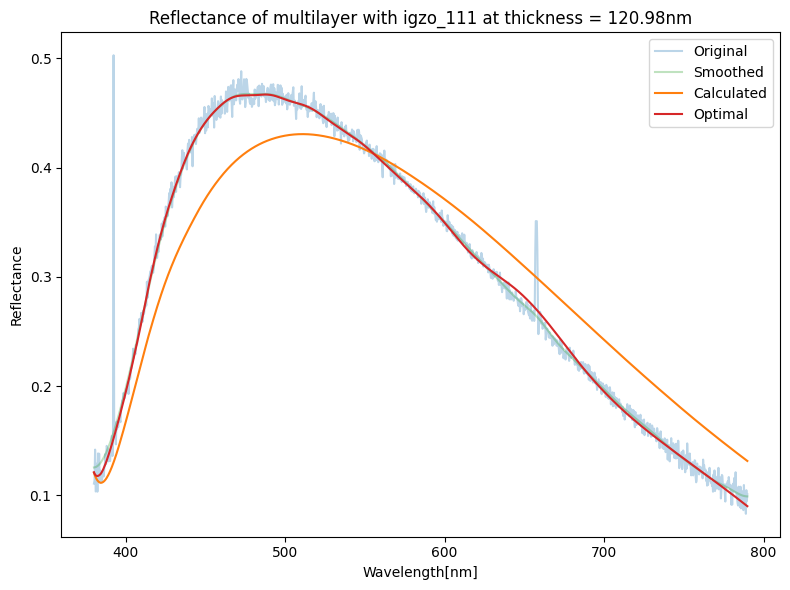

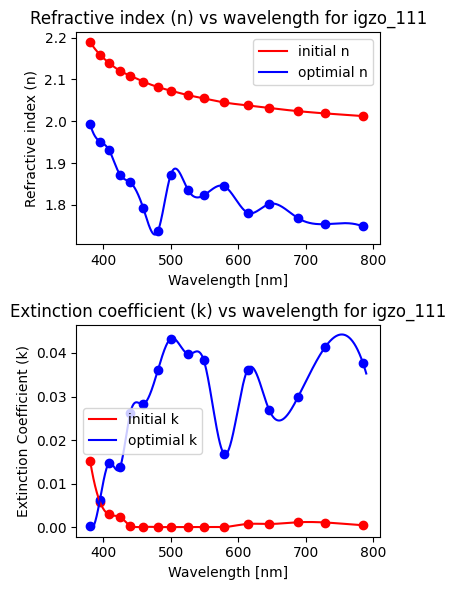

In [3]:
# 4. Plot the reflectance
plot_reflectance(data1, smooth=True, multilayer=multilayer1, layer_index=1, calculated_data=R1, optimal_data=optimal_data1)
plot_nk(data1, optimized_params1, n_points1, multilayer1, layer_index=1)

In [4]:
# 1. Provide the path of the data, lower bound of the wavelength (left), and upper bound of the wavelength (right).
path2 = r"test_data\sio2_reflectance_test.csv"
left = 260
right = 800
data2 = process_data(path2, left, right)

# 2. Create multilayer system
n_points2 = 32 # Number of points used to fit the n_spline and k_spline
air = ThinFilmLayer("air", 1, 0, left, right)
layer1 = ThinFilmLayer("sio2", 514.91, n_points2, left, right)
substrate = ThinFilmLayer("c-Si", 1, 0, left, right)

multilayer2 = ThinFilmSystem([air, layer1, substrate])
R2, _, _ = multilayer2.calculate_RTA(data2['wavelength'])

# 3. Optimization (The most time-consuming step!)
optimal_data2, optimized_params2 = optimize_nk(multilayer2, layer_index=1, data=data2, n_points=n_points2, weight_n=1, weight_k=100, smooth=False)

nk data found for air.
nk data found for sio2.
nk data found for c-Si.
Initial n of layer1 is: [1.5006 1.4982 1.4958 1.4935 1.4913 1.4892 1.4871 1.4851 1.4832 1.4814
 1.4796 1.4779 1.4762 1.4746 1.473  1.4716 1.4701 1.4687 1.4674 1.4661
 1.4649 1.4637 1.4626 1.4614 1.4604 1.4594 1.4584 1.4574 1.4565 1.4556
 1.4547 1.4538]
Initial k of layer1 is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
21
Optimal n:  [1.50710076 1.50466088 1.50115537 1.49884104 1.50011134 1.50026084
 1.50201203 1.50452628 1.49697971 1.47141371 1.47630479 1.48368865
 1.4874887  1.48682139 1.48659998 1.4717184  1.45224903 1.47662046
 1.47222595 1.47015754 1.47008601 1.46892398 1.46633728 1.46298875
 1.46314057 1.46274867 1.46236267 1.46188383 1.46139114 1.47042177
 1.47081877 1.44702578]
Optimal k:  [2.94524274e-04 1.36310110e-03 1.81257911e-03 1.31032478e-03
 3.38459687e-11 2.67455680e-05 3.18353435e-04 6.08269292e-04
 3.54521805e-04 3.82190307e-03 2.25248033e-03

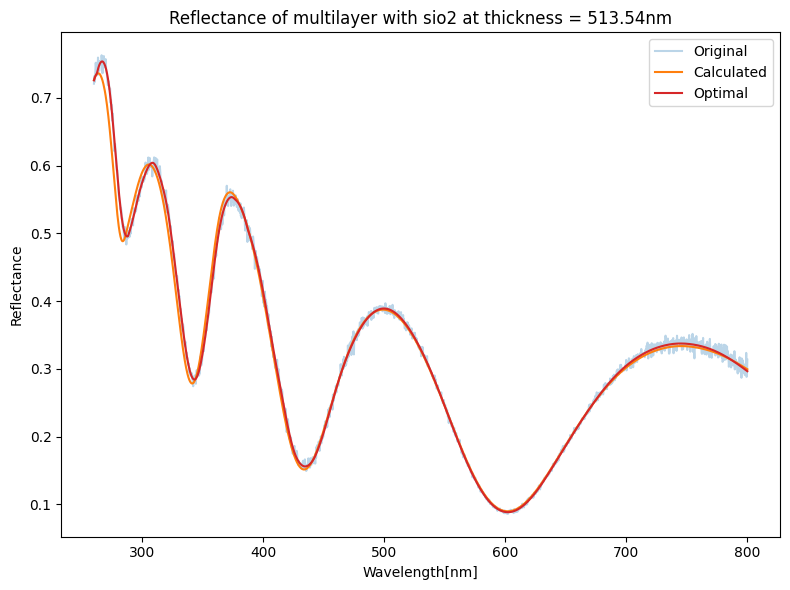

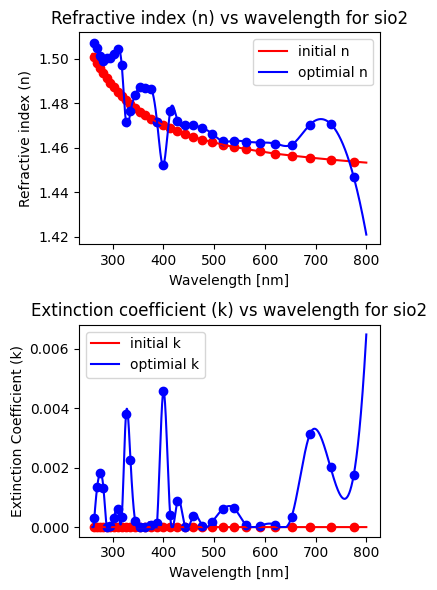

In [5]:
# 4. Plot the reflectance
plot_reflectance(data2, smooth=False, multilayer=multilayer2, layer_index=1, calculated_data=R2, optimal_data=optimal_data2)
plot_nk(data2, optimized_params2, n_points2, multilayer2, layer_index=1)